<a href="https://colab.research.google.com/github/Nhutsang/Finalproject/blob/main/fashion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
import os
import cv2
import numpy as np

data_folder = '/content/drive/MyDrive/final/DataTrain/'
categories = ['Trouser', 'Sandal', 'Glasses']

X_train = []
y_train = []

# Đọc và chuyển đổi ảnh thành ma trận numpy
for category in categories:
    category_dir = os.path.join(data_folder, category)
    for image_file in os.listdir(category_dir):
        image_path = os.path.join(category_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (256, 256))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        X_train.append(image)
        y_train.append(categories.index(category))

# Chuyển đổi danh sách thành mảng numpy
X_train = np.array(X_train)
y_train = np.array(y_train)

# In thông tin của X_train và y_train
print('Kích thước X_train:', X_train.shape)
print('Kích thước y_train:', y_train.shape)


Kích thước X_train: (30, 256, 256, 3)
Kích thước y_train: (30,)


In [110]:
y_train[11]

1

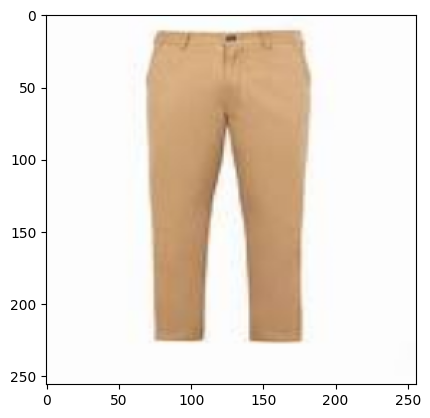

In [107]:
plt.imshow(X_train[0])

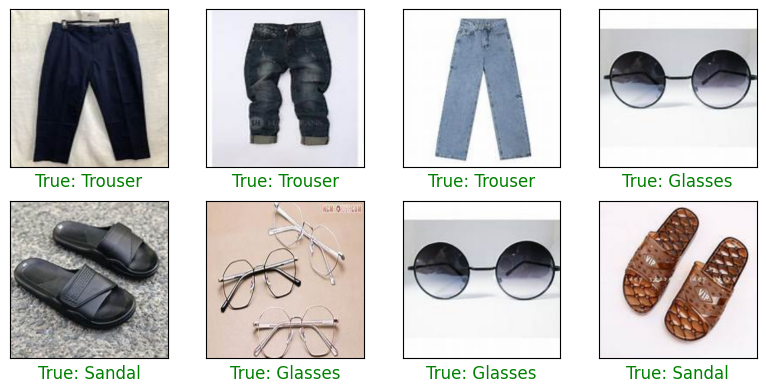

In [120]:
def plot_data(x_data: np.ndarray, y_data: np.ndarray) -> None :
  nrows, ncols = 2 ,4 
  fig, axes = plt.subplots(nrows, ncols , figsize = (8,4))
  len_x = x_data.shape[0]
  for idx  in range(nrows*ncols):
    ax = axes[idx // ncols , idx % ncols]
    img_idx = random.randint(0, len_x)

    ax.imshow(x_data[img_idx], cmap = 'gray')
    ax.set(xticks = [], yticks = [])

    true_label_str = f"True: {categories[y_data[img_idx]]}"
    ax.set_xlabel(true_label_str, color = 'green', fontsize = 12 )

  plt.tight_layout()
  plt.show()
plot_data(X_train , y_train)

In [122]:
X_train = X_train.astype(np.float32) / 255


In [124]:
classnum = len(categories)
y_train_label = keras.utils.to_categorical(y_train, classnum)

In [125]:
y_train[0] , y_train_label[0]

(0, array([1., 0., 0.], dtype=float32))

In [127]:
input_shape= (256,256,3)

In [130]:
model = keras.models.Sequential([
    layers.Flatten(input_shape = input_shape),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(classnum, activation = 'softmax')
])

model.summary( )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 196608)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               100663808 
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 3)                 771       
                                                                 
Total params: 100,795,907
Trainable params: 100,795,907
Non-trainable params: 0
_________________________________________________________________


In [134]:
model.compile(optimizer = 'rmsprop' ,
      loss = 'categorical_crossentropy',
      metrics = 'accuracy'

)

In [137]:
epschs = 10
batch_size = 1
model.fit(X_train, y_train_label, epochs = epschs, batch_size = batch_size)

Epoch 1/10
30/30 [==============================] - 0s 16ms/step - loss: 0.3451 - accuracy: 0.8667
Epoch 2/10
30/30 [==============================] - 0s 16ms/step - loss: 0.2315 - accuracy: 0.9000
Epoch 3/10
30/30 [==============================] - 0s 16ms/step - loss: 0.1649 - accuracy: 0.9667
Epoch 4/10
30/30 [==============================] - 0s 16ms/step - loss: 0.2889 - accuracy: 0.8667
Epoch 5/10
30/30 [==============================] - 0s 16ms/step - loss: 0.1532 - accuracy: 0.9333
Epoch 6/10
30/30 [==============================] - 0s 16ms/step - loss: 0.2110 - accuracy: 0.9000
Epoch 7/10
30/30 [==============================] - 0s 16ms/step - loss: 0.2299 - accuracy: 0.9333
Epoch 8/10
30/30 [==============================] - 1s 18ms/step - loss: 0.0847 - accuracy: 0.9667
Epoch 9/10
30/30 [==============================] - 1s 17ms/step - loss: 0.0410 - accuracy: 1.0000
Epoch 10/10
30/30 [==============================] - 1s 18ms/step - loss: 0.1672 - accuracy: 0.9333
